# Improve accuracy of observable dynamics with multi-product formulas

*Estimated QPU usage: 4 minutes (tested on IBM Marrakesh)*

## Background
In this notebook, you will learn how to use a **Multi-Product Formula (MPF)** to achieve a lower Trotter error on our observable compared to the one incurred by the deepest Trotter circuit that we will actually execute.
MPFs reduce the Trotter error of Hamiltonian dynamics through a weighted combination of several circuit executions. Consider the task of finding observable expectation values for the quantum state
$\rho(t)=e^{-i H t} \rho(0) e^{i H t}$ with the Hamiltonian $H$. One can use Product Formulas (PFs) to approximate the time evolution $e^{-i H t}$ by doing the following:

- Write the Hamiltonian $H$ as $H=\sum_{a=1}^d F_a,$ where $F_a$ are Hermitian operators such that each corresponding unitary can be efficiently implemented on a quantum device.
- Approximate the terms $F_a$ that do not commute with each other

Then, the $1^{st}$ order PF (Lie-Trotter formula) is:

$$S_1(t):=\prod_{a=1}^d e^{-i F_a t}$$

which has a quadratic error term $S_1(t)=e^{-i H t}+\mathcal{O}\left(t^{2}\right)$. One can also use higher-order PFs (Lie-Trotter-Suzuki formulas), which converge faster, and are defined recursively as:

$$S_2(t):=\prod_{a=1}^d e^{-i F_a t/2}\prod_{a=1}^d e^{-i F_a t/2}$$

$$S_{2 \chi}(t):= S_{2 \chi -2}(s_{\chi}t)^2 S_{2 \chi -2}((1-4s_{\chi})t)S_{2 \chi -2}(s_{\chi}t)^2$$

where $\chi$ is the order of the symmetric PF and $s_p = \left( 4 - 4^{1/(2p-1)} \right)^{-1}$. For long time-evolutions, one can split the time interval $t$ into $k$ intervals, called Trotter steps, of duration $t/k$ and approximate the time-evolution in each interval with a $\chi$ order product formula $S_{\chi}$. Thus the PF of order $\chi$ for time-evolution operator over $k$ Trotter steps is:

$$ S_{\chi}^{k}(t) = \left[ S_{\chi} \left( \frac{t}{k} \right)\right]^k = e^{-i H t}+O\left(t \left( \frac{t}{k} \right)^{\chi} \right)$$

where the error term decreases with the number of Trotter steps $k$ and the order $\chi$ of the PF.

Given an integer $k \geq 1$ and a product formula $S_{\chi}(t)$, the approximate time-evolved state $\rho_k(t)$ can be obtained from $\rho_0$ by applying $k$ iterations of the product formula $S_{\chi}\left(\frac{t}{k}\right)$.

$$
\rho_k(t)=S_{\chi}\left(\frac{t}{k}\right)^k \rho_0 S_{\chi}\left(\frac{t}{k}\right)^{-k}
$$

$\rho_k(t)$ is an approximation for $\rho(t)$ with the Trotter approximation error ||$\rho_k(t)-\rho(t) ||$. If we consider a linear combination of Trotter approximations of $\rho(t)$:


$$
\mu(t) = \sum_{j}^{l} x_j \rho^{k_j}_{j}\left(\frac{t}{k_j}\right) + \text{some remaining Trotter error} \, ,
$$

where $x_j$ are our weighting coefficients, $\rho^{k_j}_j$ is the density matrix corresponding to the pure state obtained by evolving the initial state with the product formula, $S^{k_j}_{\chi}$, involving $k_j$ Trotter steps, and $j \in {1, ..., l}$ indexes the number of PFs that make up the MPF. All the terms in $\mu(t)$ use the same product formula $S_{\chi}(t)$ as its base.
The goal is to improve upon ||$\rho_k(t)-\rho(t) \|$ by finding $\mu(t)$ with even lower $\|\mu(t)-\rho(t)\|$.

*   $\mu(t)$ needs not be a physical state as $x_i$ need not be positive. The goal here is to minimize the error in the expectation value of the observables and not to find a physical replacement for $\rho(t)$.
*   $k_j$ determines both the circuit depth and level of Trotter approximation. Smaller values of $k_j$ lead to shorter circuits which incur less circuit errors but will be less accurate approximation to the desired state.


The key here is that the remaining Trotter error given by $\mu(t)$ is smaller than the Trotter error that one would obtain by simply using the largest $k_j$ value!

You can view the usefulness of this from two perspectives:

1. For a fixed budget of Trotter steps that you are able to execute, you can obtain results with a Trotter error that is smaller in total.
2. Given some target number of Trotter steps that is too large to execute, you can use the MPF to find a collection of lower-depth circuits to run which results in a similar Trotter error.




<!--

in the limit $t \rightarrow 0$ the p-order PF is:

$$S(t)=\prod_{a=1}^d e^{-i t F_a}=e^{-i t H}+O\left(t^{p+1}\right)$$

is the order-p product formula in the limit $t \rightarrow 0$.



$$
\mu(t) = \sum_{j} x_j \rho^{k_j}_{j}\left(\frac{t}{k_j}\right) + \text{some remaining Trotter error} \, ,
$$

where $x_j$ are our weighting coefficients, $\rho^{k_j}_j$ is the density matrix corresponding to the pure state obtained by evolving the initial state with the product formula, $S^{k_j}$, involving $k_j$ Trotter steps, and $j$ indexes the number of PFs that make up the MPF. All the terms in $\mu(t)$ use the same product formula $S(t)$ as its base.
The goal is to improve upon ||$\rho_k(t)-\rho(t) \|$ by finding $\mu(t)$ with even lower $\|\mu(t)-\rho(t)\|$.

*   $\mu(t)$ needs not be a physical state as $x_i$ need not be positive. The goal here is to minimize the error in the expectation value of the observables and not to find a physical replacement for $\rho(t)$.
*   $k_j$ determines both the circuit depth and level of Trotter approximation. Smaller values of $k_j$ lead to shorter circuits which incur less circuit errors but will be less accurate approximation to the desired state.


The key here is that the remaining Trotter error given by $\mu(t)$ is smaller than the Trotter error that one would obtain by simply using the largest $k_j$ value!

You can view the usefulness of this from two perspectives:

1. For a fixed budget of Trotter steps that you are able to execute, you can obtain results with a Trotter error that is smaller in total.
2. Given some target number of Trotter steps that is too large to execute, you can use the MPF to find a shorter-depth circuit to run which results in a similar Trotter error.
 -->

## Requirements

Before starting this tutorial, ensure that you have the following installed:

* Qiskit SDK 1.0 or later, with visualization support (`pip install 'qiskit[visualization]'`)
* Qiskit Runtime 0.22 or later (`pip install qiskit-ibm-runtime`)
* MPF Qiskit addons (`pip install qiskit_addon_mpf`)
* Qiskit addons utils (`pip install qiskit_addon_utils`)
* Rustworkx graph library (`pip install rustworkx`)
* Quimb library (`pip install quimb`)
* Qiskit Quimb library (`pip install qiskit-quimb`)
* Numpy 0.21 for compatibility across packages (`pip install numpy==0.21`)

## Part I. Small scale example

### Exploring the stability of MPF

There is no obvious restriction on the choice of number of trotter steps $k_j$ that make up the MPF state $\mu(t)$. However, these must be picked carefully to avoid instabilities in the resulting expectation values calculated from $\mu(t)$. A rule of thumb for this would be to set the smallest trotter step $k_{\text{min}}$ so that $t/k_{\text{min}} \lt 1$. If you want to learn more about this and how to choose your other $k_j$ values, refer to the respective guide: [How to choose the Trotter steps for an MPF](https://qiskit.github.io/qiskit-addon-mpf/how_tos/choose_trotter_steps.html).

In the example below we explore the stability of the MPF solution by calculating the expectation value of the magnetization for a range of times using different time-evolved states. Specifically, we compare the expectation values calculated from each of the approximate time evolutions implemented with the corresponding Trotter steps and the various MPF models (static and dynamic coefficients) with the exact values of the time-evolved observable. First, let's define the parameters for the Trotter formulas and the evolution times

In [1]:
import numpy as np

mpf_trotter_steps = [1, 2, 4]
order = 2
symmetric = False

trotter_times = np.arange(0.5, 1.55, 0.1)
exact_evolution_times = np.arange(trotter_times[0], 1.55, 0.05)

For this example we will use the Neel state as the initial state $\vert \text{Neel} \rangle = \vert 0101...01 \rangle$ and the Heisenberg model on a line of 10 sites for the Hamiltonian governing the time evolution

$$
\hat{\mathcal{H}}_{Heis} = J \sum_{i=1}^{L-1} \left(X_i X_{(i+1)}+Y_i Y_{(i+1)}+ Z_i Z_{(i+1)} \right) \, ,
$$

where $J$ is the coupling strength for nearest neighbor edges.

In [2]:
from qiskit.transpiler import CouplingMap
from rustworkx.visualization import graphviz_draw
from qiskit_addon_utils.problem_generators import generate_xyz_hamiltonian
import numpy as np


L = 10

# Generate some coupling map to use for this example
coupling_map = CouplingMap.from_line(L, bidirectional=False)
graphviz_draw(coupling_map.graph, method="circo")

# Get a qubit operator describing the Heisenberg field model
hamiltonian = generate_xyz_hamiltonian(
    coupling_map,
    coupling_constants=(1.0, 1.0, 1.0),
    ext_magnetic_field=(0.0, 0.0, 0.0),
)


print(hamiltonian)

SparsePauliOp(['IIIIIIIXXI', 'IIIIIIIYYI', 'IIIIIIIZZI', 'IIIIIXXIII', 'IIIIIYYIII', 'IIIIIZZIII', 'IIIXXIIIII', 'IIIYYIIIII', 'IIIZZIIIII', 'IXXIIIIIII', 'IYYIIIIIII', 'IZZIIIIIII', 'IIIIIIIIXX', 'IIIIIIIIYY', 'IIIIIIIIZZ', 'IIIIIIXXII', 'IIIIIIYYII', 'IIIIIIZZII', 'IIIIXXIIII', 'IIIIYYIIII', 'IIIIZZIIII', 'IIXXIIIIII', 'IIYYIIIIII', 'IIZZIIIIII', 'XXIIIIIIII', 'YYIIIIIIII', 'ZZIIIIIIII'],
              coeffs=[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j])


The observable that we will be measuring is magnetization on a pair of qubits in the middle of the chain

In [ ]:
from qiskit.quantum_info import SparsePauliOp

observable = SparsePauliOp.from_sparse_list(
    [("ZZ", (L // 2 - 1, L // 2), 1.0)], num_qubits=L
)
print(observable)

SparsePauliOp(['IIIIZZIIII'],
              coeffs=[1.+0.j])


We define a transpiler pass to collect the XX and YY rotations in the circuit as a single XX+YY gate. This will allow us to leverage TeNPy's spin conservation properties during the MPO computation, significantly speeding up the calculation!

In [4]:
from qiskit.circuit.library import XXPlusYYGate
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes.optimization.collect_and_collapse import (
    CollectAndCollapse,
    collect_using_filter_function,
    collapse_to_operation,
)
from functools import partial


def filter_function(node):
    return node.op.name in {"rxx", "ryy"}


collect_function = partial(
    collect_using_filter_function,
    filter_function=filter_function,
    split_blocks=True,
    min_block_size=1,
)


def collapse_to_xx_plus_yy(block):
    param = 0.0
    for node in block.data:
        param += node.operation.params[0]
    return XXPlusYYGate(param)


collapse_function = partial(
    collapse_to_operation,
    collapse_function=collapse_to_xx_plus_yy,
)

pm = PassManager()
pm.append(CollectAndCollapse(collect_function, collapse_function))

Then we create the circuits impplementing the approximate Trotter time-evolutions.

In [5]:
from qiskit.synthesis import SuzukiTrotter
from qiskit_addon_utils.problem_generators import generate_time_evolution_circuit
from qiskit import QuantumCircuit


# Initial Neel state preparation
initial_state_circ = QuantumCircuit(L)
initial_state_circ.x([i for i in range(L) if i % 2 != 0])


all_circs = []
for total_time in trotter_times:
    mpf_trotter_circs = [
        generate_time_evolution_circuit(
            hamiltonian,
            time=total_time,
            synthesis=SuzukiTrotter(reps=num_steps, order=order),
        )
        for num_steps in mpf_trotter_steps
    ]

    mpf_trotter_circs = pm.run(mpf_trotter_circs)  # Collect XX and YY into XX + YY

    mpf_circuits = [
        initial_state_circ.compose(circuit) for circuit in mpf_trotter_circs
    ]
    all_circs.append(mpf_circuits)

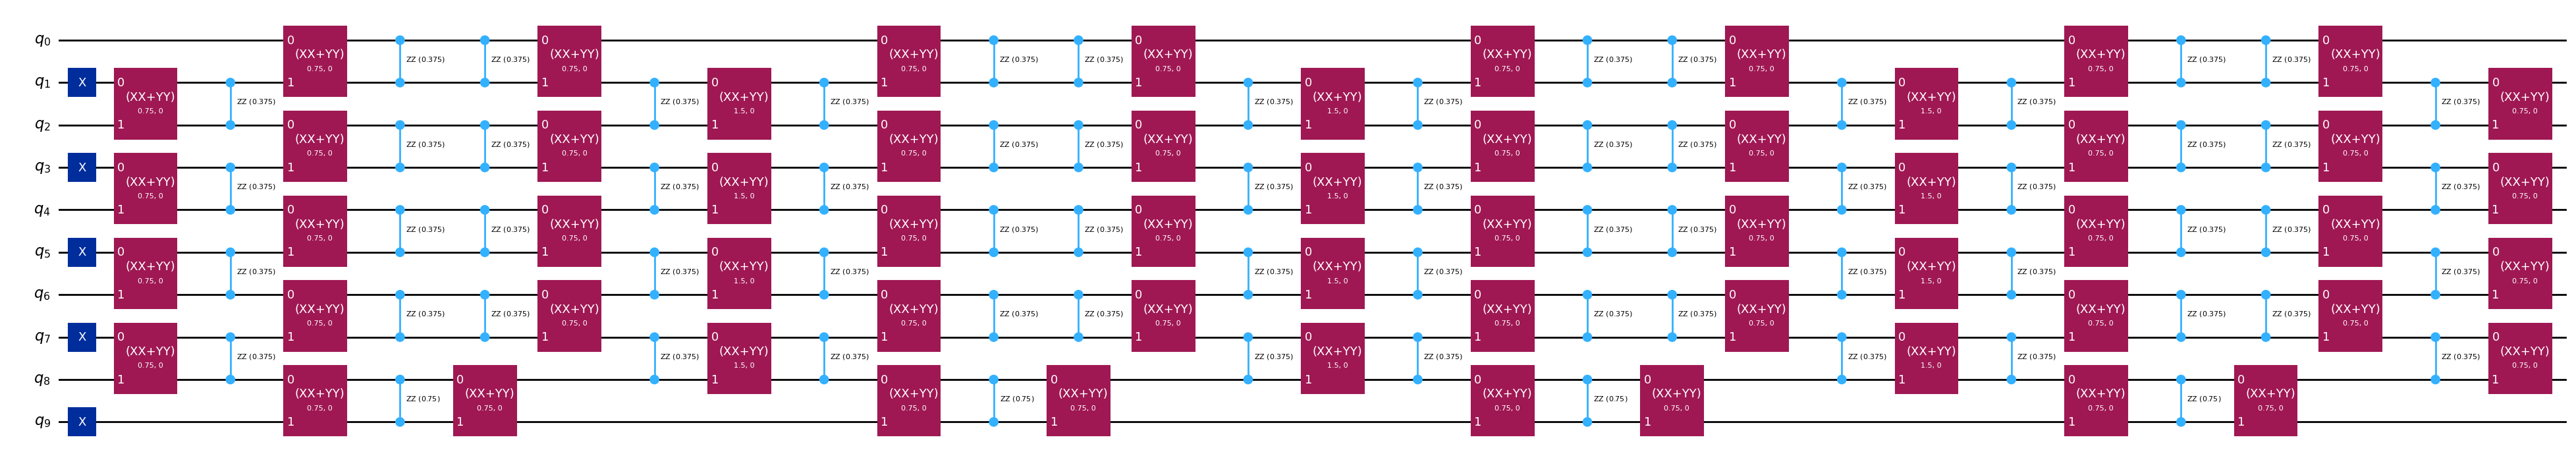

In [6]:
mpf_circuits[-1].draw("mpl", fold=-1)

And calculate the time-evolved expectation values from the Trotter circuits

In [24]:
from copy import deepcopy
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager


aer_sim = AerSimulator()
estimator = Estimator(mode=aer_sim)

mpf_expvals_all_times, mpf_stds_all_times = [], []
for t, mpf_circuits in zip(trotter_times, all_circs):
    mpf_expvals = []
    circuits = [deepcopy(circuit) for circuit in mpf_circuits]
    pm_sim = generate_preset_pass_manager(backend=aer_sim, optimization_level=3)
    isa_circuits = pm_sim.run(circuits)
    result = estimator.run(
        [(circuit, observable) for circuit in isa_circuits], precision=0.005
    ).result()
    mpf_expvals = [res.data.evs for res in result]
    mpf_stds = [res.data.stds for res in result]
    mpf_expvals_all_times.append(mpf_expvals)
    mpf_stds_all_times.append(mpf_stds)

We also calculate the exact expectation values to compare to

In [ ]:
from scipy import expm
from qiskit.quantum_info import Statevector

exact_expvals = []
for t in exact_evolution_times:
    # Exact expectation values
    exp_H = expm(-1j * t * hamiltonian.to_matrix())
    initial_state = Statevector(initial_state_circ).data
    time_evolved_state = exp_H @ initial_state

    exact_obs = (
        time_evolved_state.conj() @ observable.to_matrix() @ time_evolved_state
    ).real
    exact_expvals.append(exact_obs)

#### Static MPF coefficients

_Static_ MPFs are those where the $x_j$ values do **NOT** depend on the evolution time, $t$. Let's consider the order $\chi = 1$ PF with $k_j$ Trotter steps, this can be written as:

$$ S_1^{k_j}\left( \frac{t}{k_j} \right)=e^{-i H t}+ \sum_{n=1}^{\infty} A_n \frac{t^{n+1}}{k_j^n}  $$

where $A_n$ are matrices which depend on the commutators of $F_a$ terms in the decomposition of the Hamiltonian. It is important to note that $A_n$ themselves are independent of time and the number of Trotter steps $k_j$. Therefore, it is possible to cancel out lower-order error terms contributing to $\mu(t)$ with a careful choice of the weights $x_j$ of the linear combination. To cancel the Trotter error for the first $l-1$ terms (these will give the largest contributions as they correspond to the lower number of Trotter steps) in the expression for $\mu(t)$, the coefficients $x_j$ must satisfy the following equations:

$$ \sum_{j=1}^l x_j = 1 $$
$$ \sum_{j=1}^{l-1} \frac{x_j}{k_j^{n}} = 0 $$

with $n=0, ... l-2$. The first equation guarantees that there is no bias in the constructed state $\mu(t)$ while the second equation ensures the cancellation of the Trotter errors. For higher order PF the second equation becomes $ \sum_{j=1}^{l-1} \frac{x_j}{k_j^{\eta}} = 0 $ where $\eta = \chi + 2n$ for symmetric PFs and $\eta = \chi + n$ otherwise, with $n=0, ..., l-2$. The resulting error  (Refs. [\[1\]](#Reference1),[\[2\]](#Reference2)) is then

$$ \epsilon = \mathcal{O} \left( \frac{t^{l+1}}{k_1^l} \right)$$


Determining the static MPF coefficients for a given set of $k_j$ values amounts to solving the linear system of equations defined by the two equations above for the variables $x_j$: $Ax=b$. Where $x$ are our coefficients of interest, $A$ is a matrix which depends on $k_j$ and the type of PF we use ($S$), and $b$ is a vector of constraints. Specifically:

$$A_{0,j} = 1 $$
$$A_{i>0,j} = k_{j}^{-(\chi + s(i-1))}$$
$$b_0 = 1$$
$$b_{i>0} = 0 $$


where $\chi$ is the ``order``, $s$ is $2$ if ``symmetric`` is ``True`` and $1$ otherhwise, $k_{j}$ are the ``trotter_steps``, and $x$ are the variables to solve for. The indices $i$ and $j$ start at $0$. We can also visualize this in matrix form

$$
A =
\begin{bmatrix}
A_{0,0} & A_{0,1} & A_{0,2} & ... \\
A_{1,0} & A_{1,1} & A_{1,2} & ...  \\
A_{2,0} & A_{2,1} & A_{2,2} & ...  \\
... & ... & ... & ...
\end{bmatrix} =
\begin{bmatrix}
1 & 1 & 1 & ... \\
k_{0}^{-(\chi + s(1-1))} & k_{1}^{-(\chi + s(1-1))} & k_{2}^{-(\chi + s(1-1))} & ... \\
k_{0}^{-(\chi + s(2-1))} & k_{1}^{-(\chi + s(2-1))} & k_{2}^{-(\chi + s(2-1))} & ... \\
... & ... & ... & ...
\end{bmatrix}
$$

and

$$
b =
\begin{bmatrix}
b_{0} \\
b_{1} \\
b_{2}  \\
...
\end{bmatrix} =
\begin{bmatrix}
1 \\
0 \\
0  \\
...
\end{bmatrix}
$$



For more details refer to the documentation of Linear System of Equations ([LSE](https://qiskit.github.io/qiskit-addon-mpf/stubs/qiskit_addon_mpf.static.LSE.html)).

We can find a solution for $x$ analytically as $x = A^{-1}b$, see e.g. Refs. [\[1\]](#Reference1) or [\[2\]](#Reference2).
However, this exact solution can be _"ill-conditioned"_ resulting in very large L1-norms of our coefficients, $x$, which can lead to bad performance of the MPF.
Instead, one can also obtain an approximate solution which minimizes the L1-norm of $x$ in order to attempt and optimize the MPF behavior.




<!--
_Static_ MPFs are those where the $x_j$ values do **NOT** depend on the evolution time, $t$. Let's see some details of the static coefficients. First, define $\operatorname{Ad}_X(Y)=X Y-Y X$ and set

$$
\begin{aligned}
& \alpha_{\text {comm }}\left(p ; A_1, \ldots, A_s ; B\right) \\
& \quad=\sum_{\substack{q_1, \ldots, q_s \geq 0 \\
q_1+\ldots+q_s=p}} \frac{p !}{q_{1} ! \cdots q_{s} !}\left\|\left(\operatorname{Ad}_{A_1}\right)^{q_1} \cdots\left(\operatorname{Ad}_{A_s}\right)^{q_s}(B)\right\|
\end{aligned}
$$

Theorem (Zhuk et al., 2023):
Set $\mu_p(t)=\sum_{j=1}^r x_j \rho^{k_j}_j(t)$. There exists coefficients $x_j$ minimizing
$\kappa=\left|x_1\right|+\cdots+\left|x_r\right| \text{ s.t. } \sum_{j=1}^r x_j=1 \text{ and } \sum_{j=1}^r \frac{x_j}{k_j^q}=0 \text{ for } q \in\{p, \ldots, 2 p-1\} \text{ and for all } t \geq 0.$
This gives us

$$
\left\|\mu_p(t)-\rho(t)\right\|_1 \leq\left(\sum_{j=1}^r \frac{\left|x_j\right|}{k_j^{2 p}}\right)\left(a_1 t^{2 p+2}+a_2 t^{2 p+1}+a_3 t^{2 p}\right),
$$

for $a_{1,2,3} \geq 0$ which depend only on the order of commutators of $F_1 \ldots F_d$, order $p$ and final time $t$. In the limit $t \rightarrow \infty$

$$
\|\mu(t)-\rho(t)\|_1 \leq\left(\sum_{j=1}^r \frac{\left|x_j\right|}{k_j^{2 p}}\right) a_1 t^{2 p+2}[1+O(1 / t)]
$$ -->

##### Setting up the LSE

Now that we have chosen our $k_j$ values, we must first construct the LSE, $Ax=b$ as explained above.
The matrix $A$ depends not only on $k_j$ but also our choice of PF, in particular its _order_.
Additionally, one may take into account whether the PF is symmetric or not (see [\[1\]](#Reference1)), by setting `symmetric=True/False`.
However, this is not required as shown by Ref. [\[2\]](#Reference2).

In [9]:
from qiskit_addon_mpf.static import setup_static_lse

lse = setup_static_lse(mpf_trotter_steps, order=order, symmetric=symmetric)

Let's work through the values chosen above to construct the $A$ matrix and the $b$ vector. With $j=0,1, 2$ Trotter steps $k_j = [1, 2, 4]$, order $\chi = 2$ and choice of non-symmetric trotter steps ($s=1$) we have that the matrix elements of $A$ below the first row are determined by the expression $A_{i>0,j} = k_{j}^{-(2 + 1(i-1))}$, specifically:

$$ A_{0,0} = A_{0,1} = A_{0,2} =  1 $$
$$ A_{1,j} = k_{j}^{-1}  \rightarrow A_{1,0} = \frac{1}{1^2}, \;, A_{1,1} = \frac{1}{2^2}, \;, A_{1,2} = \frac{1}{4^2}$$
$$ A_{2,j} = k_{j}^{-2}  \rightarrow A_{2,0} = \frac{1}{1^3}, \;, A_{2,1} = \frac{1}{2^3}, \;, A_{2,2} = \frac{1}{4^3}$$

or in matrix form:

$$
A =
\begin{bmatrix}
1 & 1 & 1\\
1 & \frac{1}{2^2} & \frac{1}{4^2}  \\
1 & \frac{1}{2^3} & \frac{1}{4^3}  \\
\end{bmatrix}
$$

As it's possible to see by inspecting the `lse` object

In [10]:
lse.A

array([[1.      , 1.      , 1.      ],
       [1.      , 0.25    , 0.0625  ],
       [1.      , 0.125   , 0.015625]])

While the vector of constraints $b$ has the following elements:
$$ b_{0} = 1 $$
$$ b_1 = b_2 = 0 $$

Thus

$$
b =
\begin{bmatrix}
1 \\
0
\end{bmatrix}
$$


And similarly in `lse`

In [11]:
lse.b

array([1., 0., 0.])

The `lse` object has methods for finding the static coefficients $x_j$ satisfying the system of equations

In [12]:
mpf_coeffs = lse.solve()
print(f"The static coefficients associated with the ansatze are: {mpf_coeffs}")

The static coefficients associated with the ansatze are: [ 0.04761905 -0.57142857  1.52380952]


##### Optimizing for $x$ using an exact model

Alternatively to computing $x=A^{-1}b$, you can also use [setup_exact_model](https://qiskit.github.io/qiskit-addon-mpf/stubs/qiskit_addon_mpf.static.setup_exact_model.html) to construct a [cvxpy.Problem](https://www.cvxpy.org/api_reference/cvxpy.problems.html#cvxpy.Problem) instance which uses the LSE as constraints and whose optimal solution will yield $x$.

In the next section, it will be clear why this interface exists.

In [13]:
from qiskit_addon_mpf.costs import setup_exact_problem

model_exact, coeffs_exact = setup_exact_problem(lse)
model_exact.solve()
print(coeffs_exact.value)

[ 0.04761905 -0.57142857  1.52380952]


As an indicator whether an MPF constructed with these coefficients will yield good results, we can use the L1-norm (see also Ref. [\[1\]](#Reference1)).

In [14]:
print(
    "L1 norm of the exact coefficients:", np.linalg.norm(coeffs_exact.value, ord=1)
)  # ord specifies the norm. ord=1 is for L1

L1 norm of the exact coefficients: 2.1428571428556378


##### Optimizing for $x$ using an approximate model

It may happen that the L1 norm for the chosen set of $k_j$ values is deemed too high.
If that is the case and you cannot choose a different set of $k_j$ values, you can use an approximate solution to the LSE instead of an exact one.

To do so, simply use [setup_approximate_model](https://qiskit.github.io/qiskit-addon-mpf/stubs/qiskit_addon_mpf.static.setup_approximate_model.html) to construct a different [cvxpy.Problem](https://www.cvxpy.org/api_reference/cvxpy.problems.html#cvxpy.Problem) instance which constrains the L1-norm to a chosen threshold while minimizing the difference of $Ax$ and $b$.

In [16]:
from qiskit_addon_mpf.costs import setup_sum_of_squares_problem

model_approx, coeffs_approx = setup_sum_of_squares_problem(lse, max_l1_norm=1.5)
model_approx.solve()
print(coeffs_approx.value)
print(
    "L1 norm of the approximate coefficients:",
    np.linalg.norm(coeffs_approx.value, ord=1),
)

[-1.10294118e-03 -2.48897059e-01  1.25000000e+00]
L1 norm of the approximate coefficients: 1.5


Note, that you have complete freedom over how to solve this optimization problem, meaning that you can change the optimization solver, its convergence thresholds, and so on.
Check out the respective guide on [How to use the approximate model](https://qiskit.github.io/qiskit-addon-mpf/how_tos/using_approximate_model.html).

#### Dynamic MPF coefficients

In the previous section, we introduced a *static* matrix product formula (MPF) that improves on the standard Trotter approximation. However, this *static* version does **not** necessarily minimize the approximation error. Concretely, the static MPF, denoted $\mu^S(t)$, is *not* the optimal projection of $\rho(t)$ onto the subspace spanned by the product-formula states $\{\rho_{k_i}(t)\}_{i=1}^r$.

To address this, we consider a *dynamic* MPF (introduced in Ref. [\[2\]](#Reference2) and experimentally demonstrated in Ref. [\[3\]](#Reference3)) that **does** minimize the approximation error in the Frobenius norm. Formally, we focus on minimizing

$$
\|\rho(t) - \mu^D(t)\|_F^2 \;=\; \mathrm{Tr}\bigl[ \left( \rho(t) - \mu^D(t)\right)^2 \bigr],
$$

with respect to some coefficients $x_i(t)$ at each time $t$. The *optimal* projector in the Frobenius norm is then $\mu^D(t) \;=\; \sum_{i=1}^r x_i(t)\,\rho_{k_i}(t)$ and we call $\mu^D(t)$ the *dynamic* MPF. Plugging in the definitions above:



$$
\|\rho(t) - \mu^D(t)\|_F^2
\;=\; \\
= \mathrm{Tr}\bigl[ \left( \rho(t) - \mu^D(t)\right)^2 \bigr]
\;=\; \\
= \mathrm{Tr}\bigl[ \left( \rho(t) - \sum_{i=1}^r x_i(t)\,\rho_{k_i}(t) \right) \left(  \rho(t) - \sum_{j=1}^r x_j(t)\,\rho_{k_j}(t) \right) \bigr]
\;=\; \\
= 1 \;+\; \sum_{i,j=1}^r M_{i,j}(t)\,x_i(t)\,x_j(t)
\;-\;
2 \sum_{i=1}^r L_i^{\mathrm{exact}}(t)\,x_i(t),
$$

where $M_{i,j}(t)$ is the *Gram matrix*, defined by

$$
M_{i,j}(t) \;=\; \mathrm{Tr}\bigl[\rho_{k_i}(t)\,\rho_{k_j}(t)\bigr]
\;=\;
\bigl|\langle \psi_{\mathrm{in}} \!\mid S\bigl(t/k_i\bigr)^{-k_i}\,S\bigl(t/k_j\bigr)^{k_j} \!\mid \psi_{\mathrm{in}} \rangle \bigr|^2.
$$


and

$$
L_i^{\mathrm{exact}}(t) = \mathrm{Tr}[\rho(t)\,\rho_{k_i}(t)]
$$

represents the overlap between the *exact* state $\rho(t)$ and each product-formula approximation $\rho_{k_i}(t)$. In practical scenarios, these overlaps may only be measured approximately due to noise or partial access to $\rho(t)$.

Here, $\lvert\psi_{\mathrm{in}}\rangle$ is the initial state, and $S(\cdot)$ is the operation applied in the product formula. By choosing the coefficients $x_i(t)$ that minimize this expression (and handling approximate overlap data when $\rho(t)$ is not fully known), we obtain the “best” (in a Frobenius-norm sense) dynamic approximation of $\rho(t)$ within the MPF subspace. The quantities $L_i(t)$ and $M_{i,j}(t)$ can be calculated efficiently using tensor network methods [\[3\]](#Reference3). The MPF Qiskit addon provides several "backend" to carry out the calculation. The example below shows the most flexible way to do so and it also explained in great details in the docs page for the [TeNPy layer-based backend](https://qiskit.github.io/qiskit-addon-mpf/apidocs/qiskit_addon_mpf.backends.tenpy_layers.html#module-qiskit_addon_mpf.backends.tenpy_layers). To use this method, one starts from the circuit implementing the desired time-evolution, modelsthat represent these operations are created from the layers of the corresponding circuit. Finally, an `Evolver` object is created that can be used to generate the time-evolved quantities $M_{i,j}(t)$ and $L_i(t)$. We start by creating the  `Evolver` object corresponding to the approximate time-evolution ([`ApproxEvolverFactory`](https://qiskit.github.io/qiskit-addon-mpf/apidocs/qiskit_addon_mpf.dynamic.html#qiskit_addon_mpf.dynamic.ApproxEvolverFactory)) implemented by the circuits. In particular, extra attention should be paid to the `order` variable so that they match. Note that in generating the circuits corresponding to the approximate time-evolution we use placeholder values for the `time = 1.0` and the number of Trotter steps (`reps=1`). The correct approximating circuits are then produced by the dynamic problem solver in `setup_dynamic_lse`.

In [17]:
from qiskit_addon_utils.slicing import slice_by_depth
from qiskit_addon_mpf.backends.tenpy_layers import LayerModel
from qiskit_addon_mpf.backends.tenpy_layers import LayerwiseEvolver
from functools import partial

# Create approximate time-evolution circuits
single_2nd_order_circ = generate_time_evolution_circuit(
    hamiltonian, time=1.0, synthesis=SuzukiTrotter(reps=1, order=order)
)
single_2nd_order_circ = pm.run(single_2nd_order_circ)  # collect XX and YY

# Find layers in the circuit
layers = slice_by_depth(single_2nd_order_circ, max_slice_depth=1)

# Create tensor network models
models = [LayerModel.from_quantum_circuit(layer, conserve="Sz") for layer in layers]

# Create the time-evolution object
approx_factory = partial(
    LayerwiseEvolver,
    layers=models,
    options={
        "preserve_norm": False,
        "trunc_params": {
            "chi_max": 64,
            "svd_min": 1e-8,
            "trunc_cut": None,
        },
        "max_delta_t": 2,
    },
)

<div class="alert alert-block alert-danger">
The options of LayerwiseEvolver which determine the details of the tensor network simulation must be chosen carefully to avoid setting up an ill-defined optimization problem
</div>

We then setup the exact evolver (e.g., [`ExactEvolverFactory`](https://qiskit.github.io/qiskit-addon-mpf/apidocs/qiskit_addon_mpf.dynamic.html#qiskit_addon_mpf.dynamic.ExactEvolverFactory)) which returns an [`Evolver`](https://qiskit.github.io/qiskit-addon-mpf/apidocs/qiskit_addon_mpf.backends.html#qiskit_addon_mpf.backends.Evolver) object computing the true or “reference” time-evolution. Realistically, one would approximate the exact evolution by using a higher-order Suzuki–Trotter formula or another reliable method with a small time step. Below, we approximate the exact time-evolved state with a fourth-order Suzuki-Trotter formula using a small time step `dt=0.1`, which means the number of Trotter steps used at time $t$ is $k=t/dt$. We also specify some TeNPy-specific truncation options to bound the maximum bond dimension of the underlying tensor network as well as the minimum singular values of the split tensor network bonds. These parameters can affect the accuracy of the expectation value calculated with the dynamic MPF coefficients so it is important to explore a range of values to find the optimal balance between computational time and accuracy. Note that the calculation of the MPF coefficients does not rely of the expectation value of the PF obtained from hardware execution, therefore it can be tuned in post-processing.

In [20]:
single_4th_order_circ = generate_time_evolution_circuit(
    hamiltonian, time=1.0, synthesis=SuzukiTrotter(reps=1, order=4)
)
single_4th_order_circ = pm.run(single_4th_order_circ)
exact_model_layers = [
    LayerModel.from_quantum_circuit(layer, conserve="Sz")
    for layer in slice_by_depth(single_4th_order_circ, max_slice_depth=1)
]

exact_factory = partial(
    LayerwiseEvolver,
    layers=exact_model_layers,
    dt=0.1,
    options={
        "preserve_norm": False,
        "trunc_params": {
            "chi_max": 64,
            "svd_min": 1e-8,
            "trunc_cut": None,
        },
        "max_delta_t": 2,
    },
)

Next, create your system’s initial state in a format compatible with TeNPy (for example, an `MPS_neel_state`=$\vert 0101...01 \rangle$). This sets up the many-body wavefunction you’ll evolve in time $\lvert\psi_{\mathrm{in}}\rangle$ as a tensor

In [ ]:
from qiskit_addon_mpf.backends.tenpy_tebd import MPOState
from qiskit_addon_mpf.backends.tenpy_tebd import MPS_neel_state


def identity_factory():
    return MPOState.initialize_from_lattice(models[0].lat, conserve=True)


mps_initial_state = MPS_neel_state(models[0].lat)

For each time step $t$ we set up the dynamic linear system of equation with the [`setup_dynamic_lse`](https://qiskit.github.io/qiskit-addon-mpf/apidocs/qiskit_addon_mpf.dynamic.html) method. The corresponding object contains the information about the dynamic MPF problem: `lse.A` gives the Gram Matrix $M$ while `lse.b` gives the overlap $L$. We can then solve the LSE (when not ill-defined) to find the dynamic coefficients using the `setup_frobenius_problem`. It is important to note the difference with the static coefficients, which only depend on the detilas of the product formula used and are independent of the details of the time evolution (Hamiltonian and initial state).

In [22]:
from qiskit_addon_mpf.dynamic import setup_dynamic_lse
from qiskit_addon_mpf.costs import setup_frobenius_problem

mpf_dynamic_coeffs_list = []
for t in trotter_times:
    print(f"Computing dynamic coefficients for time={t}")
    lse = setup_dynamic_lse(
        mpf_trotter_steps,
        t,
        identity_factory,
        exact_factory,
        approx_factory,
        mps_initial_state,
    )
    problem, coeffs = setup_frobenius_problem(lse)
    try:
        problem.solve()
        mpf_dynamic_coeffs_list.append(coeffs.value)
    except Exception as error:
        mpf_dynamic_coeffs_list.append(np.zeros(len(mpf_trotter_steps)))
        print(error, "Calculation Failed for time", t)
    print("")

Computing dynamic coefficients for time=0.5

Computing dynamic coefficients for time=0.6

Computing dynamic coefficients for time=0.7

Computing dynamic coefficients for time=0.7999999999999999

Computing dynamic coefficients for time=0.8999999999999999

Computing dynamic coefficients for time=0.9999999999999999

Computing dynamic coefficients for time=1.0999999999999999

Computing dynamic coefficients for time=1.1999999999999997

Computing dynamic coefficients for time=1.2999999999999998

Computing dynamic coefficients for time=1.4

Computing dynamic coefficients for time=1.4999999999999998



Finally plot these expectation values throughout the evolution time

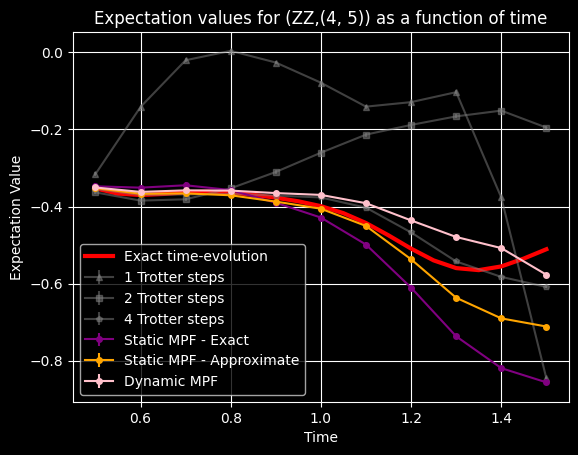

In [ ]:
import matplotlib.pyplot as plt

sym = {1: "^", 2: "s", 4: "p"}
# Get expectation values at all times for each Trotter step
for k, step in enumerate(mpf_trotter_steps):
    trotter_curve, trotter_curve_error = [], []
    for trotter_expvals, trotter_stds in zip(mpf_expvals_all_times, mpf_stds_all_times):
        trotter_curve.append(trotter_expvals[k])
        trotter_curve_error.append(trotter_stds[k])

    plt.errorbar(
        trotter_times,
        trotter_curve,
        yerr=trotter_curve_error,
        alpha=0.5,
        markersize=4,
        marker=sym[step],
        color="grey",
        label=f"{mpf_trotter_steps[k]} Trotter steps",
    )  # , , )

# Get expectation values at all times for the static MPF with exact coeffs
exact_mpf_curve, exact_mpf_curve_error = [], []
for trotter_expvals, trotter_stds in zip(mpf_expvals_all_times, mpf_stds_all_times):
    mpf_std = np.sqrt(
        sum(
            [
                (coeff**2) * (std**2)
                for coeff, std in zip(coeffs_exact.value, trotter_stds)
            ]
        )
    )
    exact_mpf_curve_error.append(mpf_std)
    exact_mpf_curve.append(trotter_expvals @ coeffs_exact.value)

plt.errorbar(
    trotter_times,
    exact_mpf_curve,
    yerr=exact_mpf_curve_error,
    markersize=4,
    marker="o",
    label="Static MPF - Exact",
    color="purple",
)


# Get expectation values at all times for the static MPF with approximate
approx_mpf_curve, approx_mpf_curve_error = [], []
for trotter_expvals, trotter_stds in zip(mpf_expvals_all_times, mpf_stds_all_times):
    mpf_std = np.sqrt(
        sum(
            [
                (coeff**2) * (std**2)
                for coeff, std in zip(coeffs_approx.value, trotter_stds)
            ]
        )
    )
    approx_mpf_curve_error.append(mpf_std)
    approx_mpf_curve.append(trotter_expvals @ coeffs_approx.value)

plt.errorbar(
    trotter_times,
    approx_mpf_curve,
    yerr=approx_mpf_curve_error,
    markersize=4,
    marker="o",
    color="orange",
    label="Static MPF - Approximate",
)

# # Get expectation values at all times for the dynamic MPF
dynamic_mpf_curve, dynamic_mpf_curve_error = [], []
for trotter_expvals, trotter_stds, dynamic_coeffs in zip(
    mpf_expvals_all_times, mpf_stds_all_times, mpf_dynamic_coeffs_list
):
    mpf_std = np.sqrt(
        sum([(coeff**2) * (std**2) for coeff, std in zip(dynamic_coeffs, trotter_stds)])
    )
    dynamic_mpf_curve_error.append(mpf_std)
    dynamic_mpf_curve.append(trotter_expvals @ dynamic_coeffs)

plt.errorbar(
    trotter_times,
    dynamic_mpf_curve,
    yerr=dynamic_mpf_curve_error,
    markersize=4,
    marker="o",
    color="pink",
    label="Dynamic MPF",
)


plt.plot(
    exact_evolution_times,
    exact_expvals,
    lw=3,
    color="red",
    label="Exact time-evolution",
)


plt.title(f"Expectation values for (ZZ,{(L//2-1, L//2)}) as a function of time")
plt.xlabel("Time")
plt.ylabel("Expectation Value")
plt.legend()
plt.grid()

In the cases like the example above, where the $k=1$ PF behaves poorly at all times, the quality of the dynamic MPF results is also heavily affected. In such situations, it is useful to investigate the possibility of using individual PFs with higher number of Trotter steps to improve the overall quality of the results. In these simulations, we see the interplay of different types of errors: error from finite sampling and Trotter error from the product formulas. MPF helps to reduce the Trotter error due to the product formulas but incur in higher sampling error compared to the product formulas. This can be advantageous as product formulas can reduce the sampling error with increased sampling but the systematic error due to the Trotter approximation remains untouched.
Another interesting behavior that we can observe from the plot is that the expectation value for the PF for $k=1$ starts to behave erratically (on top of not being a good approximation for the exact one) at times for which $t/k > 1 $, as explained in the [guide](https://qiskit.github.io/qiskit-addon-mpf/how_tos/choose_trotter_steps.html) on how to choose the number of Trotter step.

### Step 1: Map classical inputs to a quantum problem
Let's now consider a single time $t=1.0$ and calculate the expectation value of the magnetization with the various methods using one a QPU. The particular choice of $t$ was done so to maximize the difference between the various methods and observe their relative efficacy. To determine the window of time for which dynamic MPF is guaranteed to produce observables with lower error than any of the individual Trotter formulas within the multi-product, one can implement the “MPF test” - see equation (17) and surrounding text in [\[3\]](#Reference3).

### Setting up the Trotter circuits

At this point, we have found our expansion coefficients, $x$, and all that is left to do is to generate the Trotterized quantum circuits.
Once again, the [qiskit_addon_utils.problem_generators](https://qiskit.github.io/qiskit-addon-utils/stubs/qiskit_addon_utils.problem_generators.html) module comes to the rescue with a handy function do just that:

In [26]:
from qiskit.synthesis import SuzukiTrotter
from qiskit_addon_utils.problem_generators import generate_time_evolution_circuit
from qiskit import QuantumCircuit


total_time = 1.0
mpf_circuits = []
for k in mpf_trotter_steps:
    # Initial Neel state preparation
    circuit = QuantumCircuit(L)
    circuit.x([i for i in range(L) if i % 2 != 0])

    trotter_circ = generate_time_evolution_circuit(
        hamiltonian,
        synthesis=SuzukiTrotter(order=order, reps=k),
        time=total_time,
    )

    circuit.compose(trotter_circ, inplace=True)

    mpf_circuits.append(pm.run(circuit))

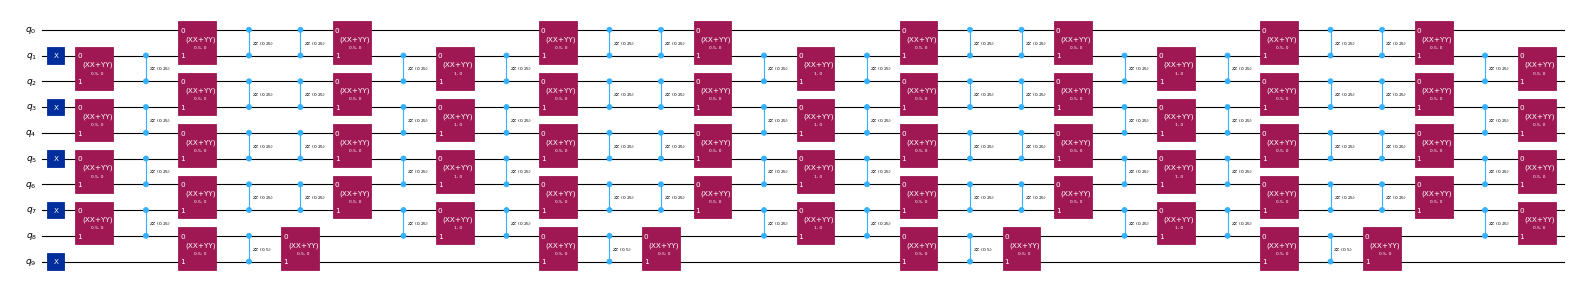

In [27]:
mpf_circuits[-1].draw("mpl", fold=-1, scale=0.4)

### Step 2: Optimize problem for quantum hardware execution
Let's return to the calculation of the expectation value for a single time point. We'll pick a backend for executing the experiment on hardware

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService


service = QiskitRuntimeService()
backend = service.least_busy(min_num_qubits=127)
print(backend)

qubits = list(range(backend.num_qubits))

Then we remove outliers qubits from the coupling map to ensure that the layout stage of the transpiler doesn't include them. Below we use the reported backend properties stored in the `target` object and remove qubits that either have measurement error or a two-qubit gate above a certain threshold (`max_meas_err`, `max_twoq_err`) or $T_2$ time (which determine the loss of coherence) below a certain threshold (`min_t2`)

In [ ]:
import copy
from qiskit.transpiler import Target, CouplingMap

target = backend.target
instruction_2q = "cz"

cmap = target.build_coupling_map(filter_idle_qubits=True)
cmap_list = list(cmap.get_edges())

max_meas_err = 0.012
min_t2 = 40
max_twoq_err = 0.005

# Remove qubits with bad measurement or t2
cust_cmap_list = copy.deepcopy(cmap_list)
for q in range(target.num_qubits):
    meas_err = target["measure"][(q,)].error
    if target.qubit_properties[q].t2 is not None:
        t2 = target.qubit_properties[q].t2 * 1e6
    else:
        t2 = 0
    if meas_err > max_meas_err or t2 < min_t2:
        # print(q)
        for q_pair in cmap_list:
            if q in q_pair:
                try:
                    cust_cmap_list.remove(q_pair)
                except ValueError:
                    continue

# Remove qubits with bad 2q gate or t2
for q in cmap_list:
    twoq_gate_err = target[instruction_2q][q].error
    if twoq_gate_err > max_twoq_err:
        # print(q)
        for q_pair in cmap_list:
            if q == q_pair:
                try:
                    cust_cmap_list.remove(q_pair)
                except ValueError:
                    continue


cust_cmap = CouplingMap(cust_cmap_list)

cust_target = Target.from_configuration(
    basis_gates=backend.configuration().basis_gates
    + ["measure"],  # or whatever new set of gates
    coupling_map=cust_cmap,
)

sorted_components = sorted(
    [list(comp.physical_qubits) for comp in cust_cmap.connected_components()],
    reverse=True,
)
print("size of largest component", len(sorted_components[0]))

size of largest component 10


We want to set `max_meas_err`,  `min_t2` and `max_twoq_err` such that we find a large enough subset of qubits that supports the circuit to run. In our case it's enough to find a 10-qubits 1D chain

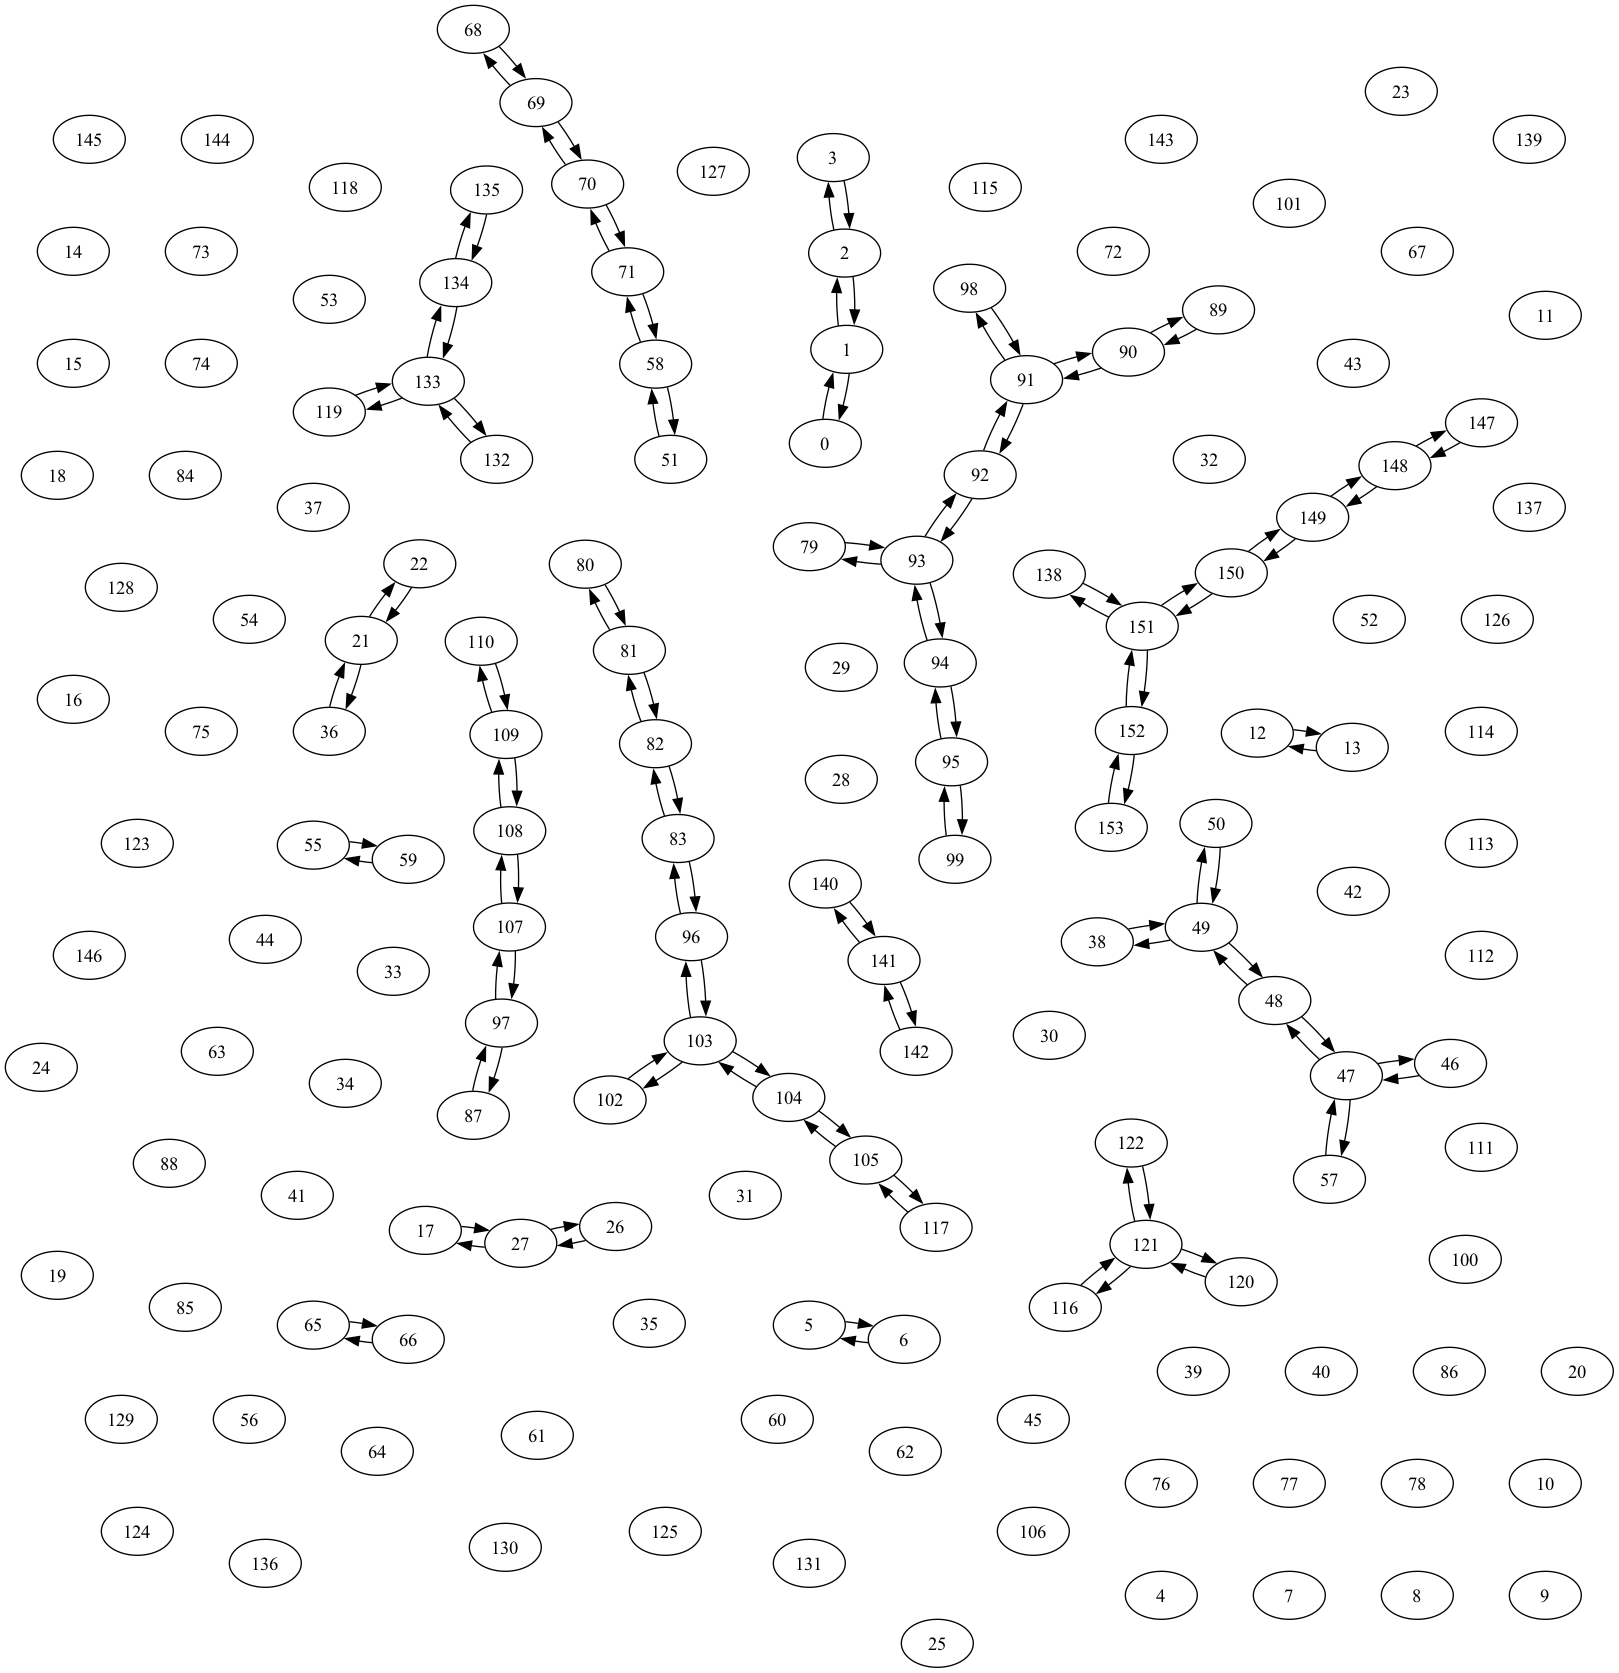

In [34]:
cust_cmap.draw()

We can then map the circuit and observable onto physical qubits of the device

In [72]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

transpiler = generate_preset_pass_manager(optimization_level=3, target=cust_target)

transpiled_circuits = [transpiler.run(circ) for circ in mpf_circuits]

qubits_layouts = [
    [
        idx
        for idx, qb in circuit.layout.initial_layout.get_physical_bits().items()
        if qb._register.name != "ancilla"
    ]
    for circuit in transpiled_circuits
]

transpiled_circuits = []
for circuit, layout in zip(mpf_circuits, qubits_layouts):
    transpiler = generate_preset_pass_manager(
        optimization_level=3, backend=backend, initial_layout=layout
    )
    transpiled_circuit = transpiler.run(circuit)
    transpiled_circuits.append(transpiled_circuit)


# transform the observable defined on virtual qubits to
# an observable defined on all physical qubits
isa_observables = [observable.apply_layout(circ.layout) for circ in transpiled_circuits]

51
OrderedDict([('sx', 310), ('rz', 232), ('cz', 132), ('x', 19)])


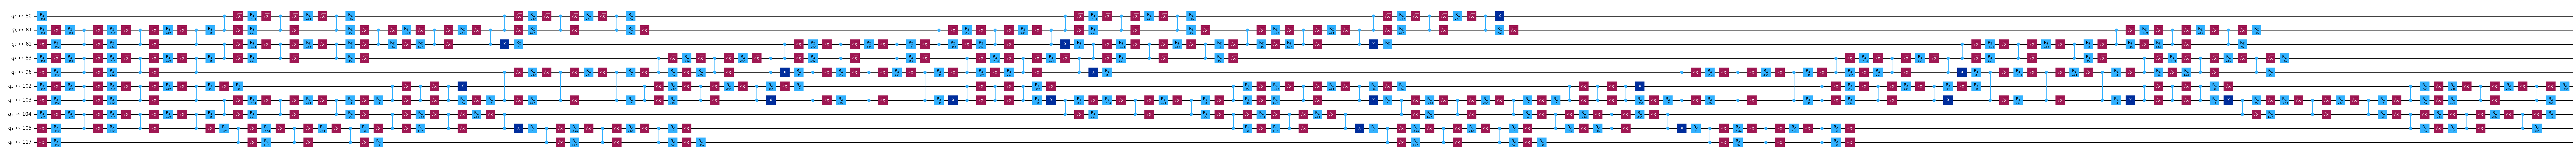

In [73]:
print(transpiled_circuits[-1].depth(lambda x: x.operation.num_qubits == 2))
print(transpiled_circuits[-1].count_ops())
transpiled_circuits[-1].draw("mpl", idle_wires=False, fold=False)

### Step 3: Execute using Qiskit primitives
With the Estimator primitive we can obtain the estimation of expectation value from the QPU. We execute the optimized AQC circuits with additional error mitigation and suppression techniques

In [ ]:
from qiskit_ibm_runtime import EstimatorV2 as Estimator


estimator = Estimator(mode=backend)
estimator.options.default_shots = 30000

# Set simple error suppression/mitigation options
estimator.options.dynamical_decoupling.enable = True
estimator.options.twirling.enable_gates = True
estimator.options.twirling.enable_measure = True
estimator.options.twirling.num_randomizations = "auto"
estimator.options.twirling.strategy = "active-accum"
estimator.options.resilience.measure_mitigation = True
estimator.options.experimental.execution_path = "gen3-turbo"

estimator.options.resilience.zne_mitigation = True
estimator.options.resilience.zne.noise_factors = (1, 3, 5)
estimator.options.resilience.zne.extrapolator = ("exponential", "linear")

estimator.options.environment.job_tags = ["mpf small"]


job = estimator.run(
    [
        (circ, observable)
        for circ, observable in zip(transpiled_circuits, isa_observables)
    ]
)

### Step 4: Post-process and return result in desired classical format


The only post-processing step is to combine the expectation value obtained from the qiskit-runtime primitives at different Trotter steps using the respective MPF coefficients. For an observable $A$ we'd have:

$$ \langle A \rangle_{\text{mpf}}  = \text{Tr} [A \mu(t)] = \sum_{j} x_j  \text{Tr} [A \rho_{k_j}] = \sum_{j} x_j \langle A \rangle_j$$

First, we extract the individual expectation values obtained for each of the Trotter circuits:

In [39]:
result_exp = job.result()
evs_exp = [res.data.evs for res in result_exp]
evs_std = [res.data.stds for res in result_exp]

print(evs_exp)

[array(-0.06361607), array(-0.23820448), array(-0.50271805)]


Next, we simply recombine them with our MPF coefficients to yield the total expectation values of the MPF. Below, we do so for each of the different ways by which we have computed $x$.

In [29]:
exact_mpf_std = np.sqrt(
    sum([(coeff**2) * (std**2) for coeff, std in zip(coeffs_exact.value, evs_std)])
)
print(
    "Exact static MPF expectation value: ",
    evs_exp @ coeffs_exact.value,
    "+-",
    exact_mpf_std,
)
approx_mpf_std = np.sqrt(
    sum([(coeff**2) * (std**2) for coeff, std in zip(coeffs_approx.value, evs_std)])
)
print(
    "Approximate static MPF expectation value: ",
    evs_exp @ coeffs_approx.value,
    "+-",
    approx_mpf_std,
)
dynamic_mpf_std = np.sqrt(
    sum(
        [
            (coeff**2) * (std**2)
            for coeff, std in zip(mpf_dynamic_coeffs_list[7], evs_std)
        ]
    )
)
print(
    "Dynamic MPF expectation value: ",
    evs_exp @ mpf_dynamic_coeffs_list[7],
    "+-",
    dynamic_mpf_std,
)

Exact static MPF expectation value:  -0.6329590442738475 +- 0.012798249760406036
Approximate static MPF expectation value:  -0.5690390035339492 +- 0.010459559917168473
Dynamic MPF expectation value:  -0.4655579758795695 +- 0.007639139186720507


Finally, for this small problem we can compute the exact reference value using [scipy.linalg.expm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.expm.html) as follows:

In [30]:
from scipy.linalg import expm
from qiskit.quantum_info import Statevector

exp_H = expm(-1j * total_time * hamiltonian.to_matrix())

initial_state_circuit = QuantumCircuit(L)
initial_state_circuit.x([i for i in range(L) if i % 2 != 0])
initial_state = Statevector(initial_state_circuit).data

time_evolved_state = exp_H @ initial_state

exact_obs = time_evolved_state.conj() @ observable.to_matrix() @ time_evolved_state
print("Exact expectation value ", exact_obs.real)

Exact expectation value  -0.39909900734489434


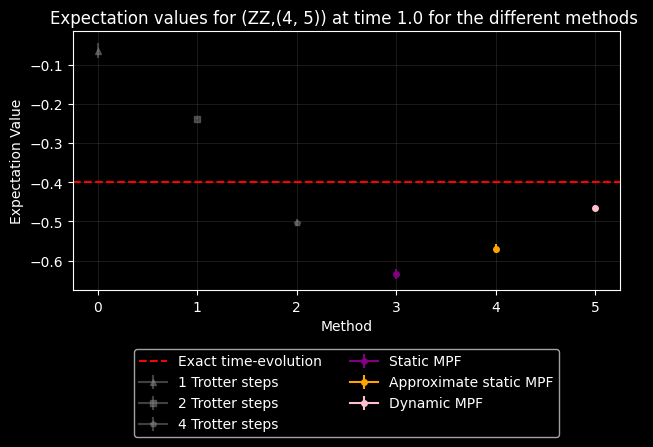

In [31]:
sym = {1: "^", 2: "s", 4: "p"}
# Get expectation values at all times for each Trotter step
for k, step in enumerate(mpf_trotter_steps):
    plt.errorbar(
        k,
        evs_exp[k],
        yerr=evs_std[k],
        alpha=0.5,
        markersize=4,
        marker=sym[step],
        color="grey",
        label=f"{mpf_trotter_steps[k]} Trotter steps",
    )  # , , )


plt.errorbar(
    3,
    evs_exp @ coeffs_exact.value,
    yerr=exact_mpf_std,
    markersize=4,
    marker="o",
    color="purple",
    label="Static MPF",
)

plt.errorbar(
    4,
    evs_exp @ coeffs_approx.value,
    yerr=approx_mpf_std,
    markersize=4,
    marker="o",
    color="orange",
    label="Approximate static MPF",
)

plt.errorbar(
    5,
    evs_exp @ mpf_dynamic_coeffs_list[7],
    yerr=dynamic_mpf_std,
    markersize=4,
    marker="o",
    color="pink",
    label="Dynamic MPF",
)

plt.axhline(y=exact_obs.real, linestyle="--", color="red", label="Exact time-evolution")


plt.title(
    f"Expectation values for (ZZ,{(L//2-1, L//2)}) at time {total_time} for the different methods "
)
plt.xlabel("Method")
plt.ylabel("Expectation Value")
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.2), ncol=2)
plt.grid(alpha=0.1)
plt.tight_layout()
plt.show()

In the example above, the dynamic MPF method performs best in terms of expectation value, improving over what one would have obtained by using the highest number of Trotter steps alone. Even though the various MPF techniques are not always achieving an improved expectation value compared to the highest number of Trotter steps (like the exact and the approximate model in the plot above), the standard deviation of these values capture well the increased variance incurred when using the MPF technique. This highlights uncertainty around the obtained expectation value, which always includes the expectation value one would expect from an exact time-evolution of the system. On the other hand, the expectation values calculated with the lower number of Trotter steps fails to even capture the exact expectation value within their uncertainty, thus confidently returning the wrong result.

In [32]:
def relative_error(ev, exact_ev):
    return abs(ev - exact_ev)


relative_error_k = [relative_error(ev, exact_obs.real) for ev in evs_exp]
relative_error_mpf = relative_error(evs_exp @ mpf_coeffs, exact_obs.real)
relative_error_approx_mpf = relative_error(
    evs_exp @ coeffs_approx.value, exact_obs.real
)
relative_error_dynamic_mpf = relative_error(
    evs_exp @ mpf_dynamic_coeffs_list[7], exact_obs.real
)

print("relative error for each trotter steps", relative_error_k)
print("relative error with MPF exact coeffs", relative_error_mpf)
print("relative error with MPF approx coeffs", relative_error_approx_mpf)
print("relative error with MPF dynamic coeffs", relative_error_dynamic_mpf)

relative error for each trotter steps [0.33548293650112293, 0.16089452939226306, 0.10361904247828346]
relative error with MPF exact coeffs 0.2338600369291003
relative error with MPF approx coeffs 0.16993999618905486
relative error with MPF dynamic coeffs 0.06645896853467514


## Part II: scale it up!

Let's scale the problem up beyond what is possible to simulate exactly. In this section we will focus on reproducing some of the results shown in Ref. [\[3\]](#Reference3).

### Step 1: Map classical inputs to a quantum problem

#### Hamiltonian

For the large scale example, we use the XXZ model on a line of 50 sites:

$$
\hat{\mathcal{H}}_{XXZ} = \sum_{i=1}^{L-1} J_{i,(i+1)}\left(X_i X_{(i+1)}+Y_i Y_{(i+1)}+ 2\cdot Z_i Z_{(i+1)} \right) \, ,
$$

where $J_{i,(i+1)}$ is a random coefficient corresponding to edge $(i, i+1)$. This is the Hamiltonian considered in the demonstration presented in Ref. [\[3\]](#Reference3).

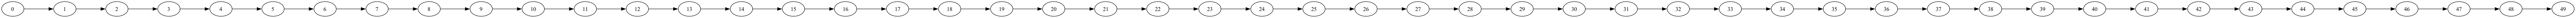

In [33]:
L = 50
# Generate some coupling map to use for this example
coupling_map = CouplingMap.from_line(L, bidirectional=False)
graphviz_draw(coupling_map.graph, method="circo")

In [34]:
import numpy as np
from qiskit.quantum_info import SparsePauliOp, Pauli


# Genereate random coefficients for our XXZ Hamiltonian
np.random.seed(0)
even_edges = list(coupling_map.get_edges())[::2]
odd_edges = list(coupling_map.get_edges())[1::2]

Js = np.random.uniform(0.5, 1.5, size=L)
hamiltonian = SparsePauliOp(Pauli("I" * L))
for i, edge in enumerate(even_edges + odd_edges):
    hamiltonian += SparsePauliOp.from_sparse_list(
        [
            ("XX", (edge), 2 * Js[i]),
            ("YY", (edge), 2 * Js[i]),
            ("ZZ", (edge), 4 * Js[i]),
        ],
        num_qubits=L,
    )

print(hamiltonian)

SparsePauliOp(['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXX', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYY', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZ', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYYII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYYIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYYIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYYIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYYIIIIIIIIII', 'IIIIIIIIIIII

For an observable we choose $Z_{24}Z_{25}$ as done in the lower panel Fig. 5 of Ref. [\[3\]](#Reference3).

In [35]:
observable = SparsePauliOp.from_sparse_list(
    [("ZZ", (L // 2 - 1, L // 2), 1.0)], num_qubits=L
)
print(observable)

SparsePauliOp(['IIIIIIIIIIIIIIIIIIIIIIIIZZIIIIIIIIIIIIIIIIIIIIIIII'],
              coeffs=[1.+0.j])


#### Choosing Trotter steps
The experiment showcased in Fig. 4 of Ref. [\[3\]](#Reference3) uses $k_j = [2, 3, 4]$ symmetric Trotter steps of order $2$. We focus on the results for time $t=3$, where the MPF and a PF with higher number of Trotter steps (6 in this case) have the same Trotter error. However, the MPF expectation value is calculated from circuits corresponding to lower number of Trotter steps and thus shallower. In practice, even if the MPF and the deeper Trotter steps circuit have the same Trotter error, we expect the experimental expectation value calculated from the MPF circuits to be closer to the theory one as it entails running shallower circuits less exposed to hardware noise compared to the circuit corresponding wo the higher Trotter step PF.

In [36]:
total_time = 3
mpf_trotter_steps = [2, 3, 4]
order = 2
symmetric = True

#### Setting up the LSE
We'll look at the static MPF coefficients for this probelm

In [37]:
lse = setup_static_lse(mpf_trotter_steps, order=order, symmetric=symmetric)
mpf_coeffs = lse.solve()
print(f"The static coefficients associated with the ansatze are: {mpf_coeffs}")
print("L1 norm:", np.linalg.norm(mpf_coeffs, ord=1))

The static coefficients associated with the ansatze are: [ 0.26666667 -2.31428571  3.04761905]
L1 norm: 5.628571428571431


In [38]:
model_approx, coeffs_approx = setup_sum_of_squares_problem(lse, max_l1_norm=2.0)
model_approx.solve()
print(coeffs_approx.value)
print(
    "L1 norm of the approximate coefficients:",
    np.linalg.norm(coeffs_approx.value, ord=1),
)

[-0.24255546 -0.25744454  1.5       ]
L1 norm of the approximate coefficients: 2.0


#### Dynamic coefficients

In [ ]:
# Create approximate time-evolution circuits
single_2nd_order_circ = generate_time_evolution_circuit(
    hamiltonian, time=1.0, synthesis=SuzukiTrotter(reps=1, order=order)
)
single_2nd_order_circ = pm.run(single_2nd_order_circ)  # collect XX and YY

# Find layers in the circuit
layers = slice_by_depth(single_2nd_order_circ, max_slice_depth=1)

# Create tensor network models
models = [LayerModel.from_quantum_circuit(layer, conserve="Sz") for layer in layers]

# Create the time-evolution object
approx_factory = partial(
    LayerwiseEvolver,
    layers=models,
    options={
        "preserve_norm": False,
        "trunc_params": {
            "chi_max": 64,
            "svd_min": 1e-8,
            "trunc_cut": None,
        },
        "max_delta_t": 4,
    },
)

# Create exact time-evolution circuits
single_4th_order_circ = generate_time_evolution_circuit(
    hamiltonian, time=1.0, synthesis=SuzukiTrotter(reps=1, order=4)
)
single_4th_order_circ = pm.run(single_4th_order_circ)
exact_model_layers = [
    LayerModel.from_quantum_circuit(layer, conserve="Sz")
    for layer in slice_by_depth(single_4th_order_circ, max_slice_depth=1)
]

# Create the time-evolution object
exact_factory = partial(
    LayerwiseEvolver,
    layers=exact_model_layers,
    dt=0.1,
    options={
        "preserve_norm": False,
        "trunc_params": {
            "chi_max": 64,
            "svd_min": 1e-8,
            "trunc_cut": None,
        },
        "max_delta_t": 3,
    },
)


def identity_factory():
    return MPOState.initialize_from_lattice(models[0].lat, conserve=True)


mps_initial_state = MPS_neel_state(models[0].lat)


lse = setup_dynamic_lse(
    mpf_trotter_steps,
    total_time,
    identity_factory,
    exact_factory,
    approx_factory,
    mps_initial_state,
)
problem, coeffs = setup_frobenius_problem(lse)
try:
    problem.solve()
    mpf_dynamic_coeffs = coeffs.value
except Exception as error:
    print(error, "Calculation Failed for time", total_time)
print("")

#### Construct each of the Trotter circuits in our MPF decomposition

In [41]:
from qiskit.synthesis import SuzukiTrotter
from qiskit_addon_utils.problem_generators import generate_time_evolution_circuit
from qiskit import QuantumCircuit


mpf_circuits = []
for k in mpf_trotter_steps:
    # Initial state preparation |1010..>
    circuit = QuantumCircuit(L)
    circuit.x([i for i in range(L) if i % 2])

    trotter_circ = generate_time_evolution_circuit(
        hamiltonian,
        synthesis=SuzukiTrotter(reps=k, order=order),
        time=total_time,
    )

    circuit.compose(trotter_circ, qubits=range(L), inplace=True)

    mpf_circuits.append(circuit)

### Construct Trotter circuit with comparable Trotter error to MPF

In [42]:
k = 6

# Initial state preparation |1010..>
comp_circuit = QuantumCircuit(L)
comp_circuit.x([i for i in range(L) if i % 2])


trotter_circ = generate_time_evolution_circuit(
    hamiltonian,
    synthesis=SuzukiTrotter(reps=k, order=order),
    time=total_time,
)

comp_circuit.compose(trotter_circ, qubits=range(L), inplace=True)


mpf_circuits.append(comp_circuit)

### Step 2: Optimize problem for quantum hardware execution

In [ ]:
import copy
from qiskit.transpiler import Target, CouplingMap

target = backend.target
instruction_2q = "cz"

cmap = target.build_coupling_map(filter_idle_qubits=True)
cmap_list = list(cmap.get_edges())

max_meas_err = 0.055
min_t2 = 30
max_twoq_err = 0.01

# Remove qubits with bad measurement or t2
cust_cmap_list = copy.deepcopy(cmap_list)
for q in range(target.num_qubits):
    meas_err = target["measure"][(q,)].error
    if target.qubit_properties[q].t2 is not None:
        t2 = target.qubit_properties[q].t2 * 1e6
    else:
        t2 = 0
    if meas_err > max_meas_err or t2 < min_t2:
        # print(q)
        for q_pair in cmap_list:
            if q in q_pair:
                try:
                    cust_cmap_list.remove(q_pair)
                except ValueError:
                    continue

# Remove qubits with bad 2q gate or t2
for q in cmap_list:
    twoq_gate_err = target[instruction_2q][q].error
    if twoq_gate_err > max_twoq_err:
        # print(q)
        for q_pair in cmap_list:
            if q == q_pair:
                try:
                    cust_cmap_list.remove(q_pair)
                except ValueError:
                    continue


cust_cmap = CouplingMap(cust_cmap_list)

cust_target = Target.from_configuration(
    basis_gates=backend.configuration().basis_gates
    + ["measure"],  # or whatever new set of gates
    coupling_map=cust_cmap,
)

sorted_components = sorted(
    [list(comp.physical_qubits) for comp in cust_cmap.connected_components()],
    reverse=True,
)
print("size of largest component", len(sorted_components[0]))

size of largest component 73


In [104]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

transpiler = generate_preset_pass_manager(optimization_level=3, target=cust_target)

transpiled_circuits = [transpiler.run(circ) for circ in mpf_circuits]

qubits_layouts = [
    [
        idx
        for idx, qb in circuit.layout.initial_layout.get_physical_bits().items()
        if qb._register.name != "ancilla"
    ]
    for circuit in transpiled_circuits
]

transpiled_circuits = []
for circuit, layout in zip(mpf_circuits, qubits_layouts):
    transpiler = generate_preset_pass_manager(
        optimization_level=3, backend=backend, initial_layout=layout
    )
    transpiled_circuit = transpiler.run(circuit)
    transpiled_circuits.append(transpiled_circuit)


# transform the observable defined on virtual qubits to
# an observable defined on all physical qubits
isa_observables = [observable.apply_layout(circ.layout) for circ in transpiled_circuits]

### Step 3: Execute using Qiskit primitives

In [ ]:
from qiskit_ibm_runtime import EstimatorV2 as Estimator

estimator = Estimator(mode=backend)
estimator.options.default_shots = 30000

# Set simple error suppression/mitigation options
estimator.options.dynamical_decoupling.enable = True
estimator.options.twirling.enable_gates = True
estimator.options.twirling.enable_measure = True
estimator.options.twirling.num_randomizations = "auto"
estimator.options.twirling.strategy = "active-accum"
estimator.options.resilience.measure_mitigation = True
estimator.options.experimental.execution_path = "gen3-turbo"

estimator.options.resilience.zne_mitigation = True
estimator.options.resilience.zne.noise_factors = (1, 1.2, 1.4)
estimator.options.resilience.zne.extrapolator = "linear"

estimator.options.environment.job_tags = ["mpf large"]

job_50 = estimator.run(
    [
        (circ, observable)
        for circ, observable in zip(transpiled_circuits, isa_observables)
    ]
)

### Step 4: Post-process and return result in desired classical format

In [46]:
result = job_50.result()
evs = [res.data.evs for res in result]
std = [res.data.stds for res in result]

print(evs)
print(std)

[array(-0.08034071), array(-0.00605026), array(-0.15345759), array(-0.18127293)]
[array(0.04482517), array(0.03438413), array(0.21540776), array(0.21520829)]


In [52]:
exact_mpf_std = np.sqrt(
    sum([(coeff**2) * (std**2) for coeff, std in zip(mpf_coeffs, std[:3])])
)
print("Exact static MPF expectation value: ", evs[:3] @ mpf_coeffs, "+-", exact_mpf_std)
approx_mpf_std = np.sqrt(
    sum([(coeff**2) * (std**2) for coeff, std in zip(coeffs_approx.value, std[:3])])
)
print(
    "Approximate static MPF expectation value: ",
    evs[:3] @ coeffs_approx.value,
    "+-",
    approx_mpf_std,
)
dynamic_mpf_std = np.sqrt(
    sum([(coeff**2) * (std**2) for coeff, std in zip(mpf_dynamic_coeffs, std[:3])])
)
print(
    "Dynamic MPF expectation value: ",
    evs[:3] @ mpf_dynamic_coeffs,
    "+-",
    dynamic_mpf_std,
)

Exact static MPF expectation value:  -0.47510243192011536 +- 0.6613940032465087
Approximate static MPF expectation value:  -0.20914170384216998 +- 0.32341567460419135
Dynamic MPF expectation value:  -0.07994951978722761 +- 0.07423091963310202


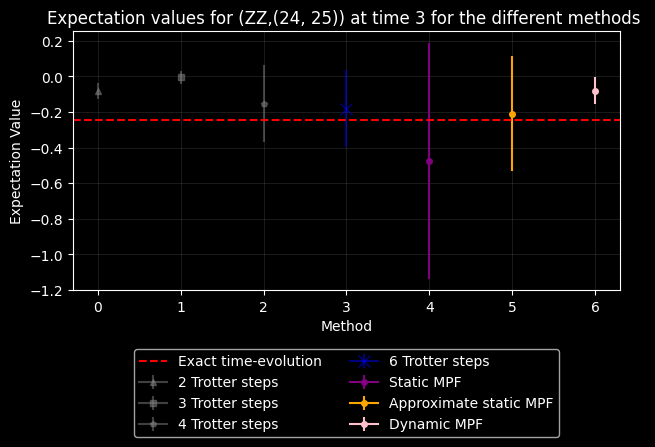

In [ ]:
sym = {2: "^", 3: "s", 4: "p"}
# Get expectation values at all times for each Trotter step
for k, step in enumerate(mpf_trotter_steps):
    plt.errorbar(
        k,
        evs[k],
        yerr=std[k],
        alpha=0.5,
        markersize=4,
        marker=sym[step],
        color="grey",
        label=f"{mpf_trotter_steps[k]} Trotter steps",
    )


plt.errorbar(
    3,
    evs[-1],
    yerr=std[-1],
    alpha=0.5,
    markersize=8,
    marker="x",
    color="blue",
    label="6 Trotter steps",
)


plt.errorbar(
    4,
    evs[:3] @ mpf_coeffs,
    yerr=exact_mpf_std,
    markersize=4,
    marker="o",
    color="purple",
    label="Static MPF",
)

plt.errorbar(
    5,
    evs[:3] @ coeffs_approx.value,
    yerr=approx_mpf_std,
    markersize=4,
    marker="o",
    color="orange",
    label="Approximate static MPF",
)

plt.errorbar(
    6,
    evs[:3] @ mpf_dynamic_coeffs,
    yerr=dynamic_mpf_std,
    markersize=4,
    marker="o",
    color="pink",
    label="Dynamic MPF",
)

exact_obs = -0.24384471447172074  # Calculated via Tensor Network calculation
plt.axhline(y=exact_obs, linestyle="--", color="red", label="Exact time-evolution")


plt.title(
    f"Expectation values for (ZZ,{(L//2-1, L//2)}) at time {total_time} for the different methods "
)
plt.xlabel("Method")
plt.ylabel("Expectation Value")
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.2), ncol=2)
plt.grid(alpha=0.1)
plt.tight_layout()
plt.show()

When executing circuits on hardware we may encounter additional challenges in obtaining accurate expectation values due to the presence of hardware noise. This is not accounted for in the MPF formalism and could play against the MPF solution. For example, this could be the reason for the failure of the dynamic coefficients to provide a better estimate of the expectation value compared to the approximate static coefficient in the plot. That is, the approximate evolver, which simulates the approximate circuit, does not accurately reflect the results obtained by executing the approximate circuits in the presence of hardware noise. For these reasons, it is recommended to combine different error mitigation techniques in order to get results as close as possible to the ideal values for each of the product formulas. This will show consistent benefits from the MPF approach.
Overall, the approximate static coefficients still give a more accurate solution than the product formula with higher number of trotter steps with the same amount of Trotter error in the noiseless setting.

It is also important to note that in this example which reproduces the experiment in Ref.  [\[3\]](#Reference3), the time point $t=3$ is beyond the limit at which it is expected that the PF with $k=2$ behaves well, that is $t/k>1$ as discussed in this [guide](https://qiskit.github.io/qiskit-addon-mpf/how_tos/choose_trotter_steps.html).

## References

[\[1\]](#Reference1) [Vazquez, A. C., Egger, D. J., Ochsner, D., & Woerner, S. (2023). Well-conditioned multi-product formulas for hardware-friendly Hamiltonian simulation. Quantum, 7, 1067.](https://quantum-journal.org/papers/q-2023-07-25-1067/)

[\[2\]](#Reference2) [Zhuk, S., Robertson, N. F., & Bravyi, S. (2024). Trotter error bounds and dynamic multi-product formulas for Hamiltonian simulation. Physical Review Research, 6(3), 033309.](https://journals.aps.org/prresearch/abstract/10.1103/PhysRevResearch.6.033309)

[\[3\]](#Reference3) [Robertson, N. F., et al. (2024). Tensor network enhanced dynamic multiproduct formulas. arXiv preprint arXiv:2407.17405.](https://arxiv.org/abs/2407.17405)

## Tutorial Survey
<table style="width: 100%;">
<tbody>
<tr>
<td style="width: 10%;"><img src="https://learning-api.quantum.ibm.com/assets/53171443-b07b-4ae6-a4be-9aec32a854f5" alt="Survey" width="100%" height="100%"></td>
<td style="width: 80%;"><strong><a title="Tutorial Survey" href="https://your.feedback.ibm.com/jfe/form/SV_9oxLZ9HicmqM54a" target="_blank">Tutorial Survey</a></strong><br>Please take one minute to provide feedback on this tutorial. Your insights will help us improve our content offerings and user experience.</td>
</tr>
</tbody>
</table>

© IBM Corp. 2025